## Part 1. Gaussian quadrature

The Gaussian quadrature method is one of the methods of numerical integration that allows you to increase the accuracy of integration, by using orthogonal polynomials and their roots as nodes.

$$
\int_a^b \!  w(x)\, f(x)\, dx \approx \sum_{k=1}^n w_k \, f(x_k) \;,
$$

here $\omega$ is the weight function, this weight function determines the basis of orthogonal polynomials whose roots are used as integration nodes. If the function $f(x)$ is a polynomial, then such an integration method gives *exact* value for the integral.

For example, let's calculate the following integral:
$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  \label{eq1}\tag{1}
$$

Here function is already polynomial, so we put the weight function $\omega(x) = 1$. Then the calculation of the integral reduces to the sum in the polynomials roots witch corresponding to the weight function $\omega(x) = 1$. For example, here https://dlmf.nist.gov/18.3 you may see which basis of polynomials corresponds to your weight function.

You may see, that Legendre polynomials correspond to our weight function. Now go to the documentation https://docs.scipy.org/doc/scipy/reference/special.html#orthogonal-polynomials. Here, the function *roots_legendre* immediately gives you the roots of the Legendre polynomial and weight at this roots (for Legendre polynomials all these weight are ones).


### Task 1.1
(20% of the grade)

1. Calculate the exact value of the integral ([1](#mjx-eqn-eq1)) using a pen and paper (or in your mind). Remember it, then you will compare numerical results with it.

Можно убрать половину членов, заметив что они нечетные фукнции, тогда останется -8 * (2/3) + 6

То есть значение интеграла это 2/3

2. Calculate the value of the integral ([1](#mjx-eqn-eq1)) using the usual method of numerical integration on a uniform grid (for example, implemented by you in week_6_calculus homework). Estimate the number of nodes needed to achieve relative accuracy $10^{-10}$.

In [2]:
### Enter your code and answer here
import numpy as np

def midpoint_rule(func, a, b, eps):                                       # функция, написанная в шестой неделе
    """ Calculate the integral of f from a to b using the midpoint rule.   
    
    Parameters
    ----------
    func : callable
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    eps : float
        The target accuracy of the estimate.
        
    Returns
    -------
    integral : float
        The estimate of $\int_a^b f(x) dx$.
    intervals : int
        Number of intervals in finite sum
    """
    # ... ENTER YOUR CODE HERE ...
    N = 100                  # начинаю со 100 отрезков
    step_n = (b - a) / N
    step_2n = (b - a) / (2*N)
    I_n = 0
    I_2n = 0
    for i in range(N):
        I_n += func(a + step_n/2 + step_n * i) * step_n       #два первых шага сетки
    for i in range(2 * N):
        I_2n += func(a + step_2n/2 + step_2n * i) * step_2n
        
    
    while np.abs(I_2n - I_n) > eps:   # в случае невыполнения условия, I_2n становится I_n, для I_2n увеличиваю число узлов в два раза
        I_n = I_2n
        step_2n /= 2
        I_2n = 0
        N *= 2
        
        for i in range(2 * N):
            I_2n += func(a + step_2n/2 + step_2n * i) * step_2n
        
    return I_2n, 2*N   # возвращаю сразу и кол-во интервалов


truth = 2./3      # точное значение интеграла

def f(x):
    return 7*x**3 - 8*x**2 - 3*x + 3     # интегрируемая функция

acc = 1e-10
Integral, N = midpoint_rule(f, -1, 1, acc)
print('Значение интеграла (1) = ', Integral)
print(f'Для достижения точности {acc} потребовалось {N} узлов равномерной сетки')

Значение интеграла (1) =  0.666666666698381
Для достижения точности 1e-10 потребовалось 409600 узлов равномерной сетки


3. Calculate the integral ([1](#mjx-eqn-eq1)) using the roots of the Legendre polynomial from 1 to 6 degrees as nodes (to get roots and weigths use scipy.special.roots_legendre)

In [3]:
### Enter your code here
import scipy.special as scsp

for n in range(1, 7):
    nodes, w = scsp.roots_legendre(n)    # получаем вектор узлов и весов для них
    integral = 0
    for i in range(n):
        integral += w[i]*f(nodes[i])
    print(f'For degree of {n}, error of integral is equal to {np.abs(integral-truth)}')   # выводим разницу аналитического и численного результатов

For degree of 1, error of integral is equal to 5.333333333333333
For degree of 2, error of integral is equal to 7.771561172376096e-16
For degree of 3, error of integral is equal to 2.7755575615628914e-15
For degree of 4, error of integral is equal to 1.1102230246251565e-16
For degree of 5, error of integral is equal to 1.887379141862766e-15
For degree of 6, error of integral is equal to 2.886579864025407e-15


Compare the number of nodes needed to obtain the same accuracy in both numerical methods.

Уже с двумя узлами, неточность вычисления интеграла на 5 порядка меньше чем на равномерной сетке с огромным количеством узлов

А это потому, что наша функция 3 степени, что значит хороший результат уже со второй степени

### Task 1.2
(20% of the grade)

Calculate the value of the same integral, but on the interval from 0 to 10.
$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx 
$$

Please note that you can no longer directly use Legendre polynomials, because they are defined for the interval (-1,1). But you can always make an *affine transformation* (a transformation that does not change the area) in order to go to the desired coordinate system.

In [43]:
### Enter your code here

def affine(a0, b0, a, b):                        # афинное преобразование одного отрезка(задан [a0, b0]) в другой([a, b])
    a0, b0 = np.min([a0, b0]), np.max([a0, b0])
    a, b = np.min([a, b]), np.max([a, b])
    
    stretch = np.abs((b - a) / (b0 - a0))           # изменение длины
    
    shift = a - a0 * stretch                         # смещение левой границы начального отрезка после растяжения
    return stretch, shift

#truth = 14713.333333333333
print('Истинное значение это 14713.333333333333')
for n in range(1, 7):
    nodes, w = scsp.roots_legendre(n)
    
    stretch, shift = affine(-1, 1, 0, 10)
    
    nodes = nodes * stretch + shift       # сместили корни на нужный нам интервал
    
    integral = 0
    for i in range(n):
        integral += w[i] * f(nodes[i]) * stretch
    print(f'For degree of {n}, integral is equal to {integral}')

Истинное значение это 14713.333333333333
For degree of 1, integral is equal to 6630.0
For degree of 2, integral is equal to 14713.333333333336
For degree of 3, integral is equal to 14713.333333333332
For degree of 4, integral is equal to 14713.333333333334
For degree of 5, integral is equal to 14713.333333333332
For degree of 6, integral is equal to 14713.333333333334


Видно, что уже с 2 узлами ошибка порядка 1e-12, связанная c хранением чисел

### Task 1.3
(20% of the grade)

Calculate the value of the following integral:
$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}}
$$
by using the corresponding basis of orthogonal polynomials. 
Find the degree of the polynomial (number of nodes) at which the accuracy of the integral starts to exceed the double floating point accuracy.

In [10]:
### Enter your code here
# видно, что это похоже на полиномы Чебышева 1 рода, но немного смещенная; вынесем из корня 4 Pi**2, сделаем замену переменной, чтобы прийти к нужному весу
# Тогда интеграл будет от 0 до 1, а аргумент косинуса станет (2 * Pi * x)
# А еще можно воспользоваться четностью функции, чтобы совсем подвести интергал под полиномы Чебышева, и интгерировать от -1 до 1, но разделив на 2

def func(x):
    return np.cos(2 * np.pi * x)

truth = 0.34601015881226427 # интеграл выражается через функцию Бесселя

for n in range(1, 21):
    nodes, w = scsp.roots_chebyt(n)
    
    integral = 0
    
    for i in range(n):
        integral += w[i] * func(nodes[i])
    integral /= 2                          # /2 появляется, из-за изменения пределов интегрирования
    
    print(f'For degree of {n}, error of integral is equal to {np.abs(integral-truth)}')

For degree of 1, error of integral is equal to 1.2247861679826322
For degree of 2, error of integral is equal to 0.7642430720804387
For degree of 3, error of integral is equal to 0.8751592887589293
For degree of 4, error of integral is equal to 0.23025656558085106
For degree of 5, error of integral is equal to 0.031850907536460804
For degree of 6, error of integral is equal to 0.002775177168371501
For degree of 7, error of integral is equal to 0.00016783546433718488
For degree of 8, error of integral is equal to 7.4911851228876e-06
For degree of 9, error of integral is equal to 2.575610645871862e-07
For degree of 10, error of integral is equal to 7.041587757328216e-09
For degree of 11, error of integral is equal to 1.5689644028427097e-10
For degree of 12, error of integral is equal to 2.9057867223514222e-12
For degree of 13, error of integral is equal to 4.5352610555937645e-14
For degree of 14, error of integral is equal to 4.440892098500626e-16
For degree of 15, error of integral is e

Видно, что начиная с 18 узлов, мы уже не можем различить результат

## Part 2. Fredholm equation

There are two types of Fredholm equations. 

1. Fredholm equation of the first kind:
$$
\int_a^b \! K(x, t)\, \color{blue}{f(t)} \,dt = g(x)
$$

2. Fredholm equation of the second kind:
$$
\lambda \int_a^b\! K(x, t)\, \color{blue}{f(t)} \, dt + g(x) = \color{blue}{f(x)}
$$

Here higtlighted function $f(x)$ is unknown, kernel function $K(x, t)$ and given function $g(x)$, $\lambda$ is a real number. Numerically, Fredholm equations of the first kind are very ill-conditioned. We will consider equations of the second kind only.

The basic idea is to approximate the integral by some quadrature formula

$$
\int_a^b \! \xi(t)\, dt \approx \sum_j^N w_j\, \xi(t_j)
$$

with appropriate weights $w_j$ and nodes $t_j$ and $j=1, \dots, N$. The accuracy of the approximation is controlled by $N$.

This way, the FE is approximated by 

$$
\lambda \sum_j w_j\, K(x, t_j)\, \color{blue}{f(t_j)} + g(x) = \color{blue}{f(x)}
$$

Note that here $x$ is a continuous variable, and we only discretized $t$.


Evaluating this equation on the grid $x = t_k$, we obtain

$$
\lambda \sum_j w_j \, K_{k, j}\, \color{blue}{f_j} + g_k = \color{blue}{f_k}
$$

where $f_j \equiv f(t_j)$, $g_j \equiv g(t_j)$ and $K_{k, j} \equiv K(t_k, t_j)$. This is nothing but a system of linear algebraic equations for the vector of $\color{blue}{f_j}$.

Its solution gives the values of the unknown function $f(x)$ at the discrete values $x=t_j$ for $j=1, \dots, N$.

### Task 2.1
(20% of the grade)

Solve an example Fredholm equation of the second kind

$$
f(x) = \sin(\pi x)  + \frac{1}{2} \int_0^1\! f(t) \, dt
$$

Here $a, b = 0, 1$, $\lambda = \dfrac{1}{2}$, the kernel is $K(x, t) = 1$ and the right-hand side $g(x) = \sin(\pi x)$.

In fact, the exact solution is (В. А. Попов, Сборник задач по интегральным уравнениям, 2006, стр. 5)

$$
f(x) = \sin(\pi x) + \frac{2}{\pi}
$$

For the integral, we can use a Gaussian quadrature with the weight function $w(x) = 1$ on $(0, 1)$. Looking at http://dlmf.nist.gov/18.3, and find the corresponding function in *scipy.special* (pay attention to the integration interval).

Compare the obtained function values with the true solution for different values of $N$. What value of $N$ can you stop at?

Кол-во узлов: 9 и дисперсия на сетке равна 3.6821932062951477e-16


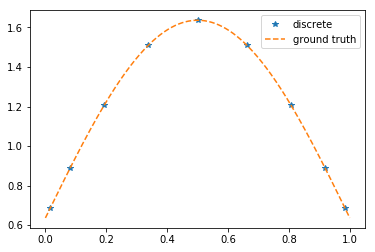

In [6]:
### Enter your code here
import matplotlib.pyplot as plt

def exact(x):
    return np.sin(np.pi * x) + 2 / np.pi     # аналитическое решение

def K(x, y):
    return 1       # ядро

def g(x):
    return np.sin(np.pi * x)    # данная функция

def f_FEsecond_discrete(g, K, l, w_n):     # принимает на вход g, K и lambda из уравнения Фредгольма, и также сетку+веса для нее в переменной w_n
    N = w_n[0].shape[0]
    
    X = w_n[0]
    w = w_n[1]
    
    M = np.eye(N)         # у нас есть в одной части просто f_k, что дает просто единицу
    for k in range(N):
        for j in range(N):
            M[k, j] -= l * K(X[k], X[j]) * w[j]        # остальные элементы для СЛАУ по f приходят из суммы K_kj * f_j
    
    G = np.array([g(x) for x in X])               # находим g_k
    
    f_discrete = np.linalg.solve(M, G)            # используем встроенную функцию, чтобы решить СЛАУ
    
    return X, f_discrete               # возвращаем и сетку, и значения на ней(хотя сетку нам изначально и подали, можно и не возвращать)


a = 0.
b = 1.
lamb = 0.5


N = 1 # начинаем с 1 узла
acc = 1e-15 # точность

while(True):
    w_n = scsp.roots_sh_legendre(N)        # сами понимаем, что тут из-за веса 1 и интервала от 0 до 1 можно использовать shifted_legendre
    
    x, y = f_FEsecond_discrete(g, K, lamb, w_n)     # получаем наши значения на сетке с N узлами
    
    Exact = np.array([exact(t) for t in x])      # можно останавливаться, например, когда дисперсия будет меньше нужной нам точности(по значениям в узлах), поэтому заведем массив точных значений в узлах
    Error = (np.sum((Exact - y)**2))**0.5        # дисперсия
    if Error < acc:
        print(f'Кол-во узлов: {N} и дисперсия на сетке равна {Error}')
        break
    N += 1



plt.plot(x, y, '*', label='discrete')     # строим значение в узлах

X = np.arange(0, 1+1e-3, 1e-3)    # это будет сетка для построения нашего аналитического решения
true = [exact(t) for t in X]
plt.plot(X, true, '--', label='ground truth')

plt.legend()
plt.show()



### Task 2.2
(20% of the grade)

An obvious issue with the privious result for $f(x)$ that it returns the solution on a fixed set of points. We do not control precise positions of these points.

1. First, let's try to interpolate the values obtained in the previous task to a uniform grid of length 50. You may use any interpolation method. Compare the interpolation values with exact solution values.

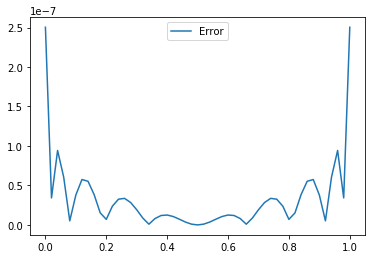

In [89]:
### Enter your code here
step = 1 / 50
uniform = np.arange(0, 1+step, step)    # создаем равномерную сетку

def P(X_Nodes, Y_Nodes, x):                 # код с 6 недели, который исользует полином Лагранжа(для любой сетки)
    result = 0
    N = X_Nodes.shape[0]
    for i in range(N):
        l = 1
        for j in range(N):
            if i != j:
                l *= (x - X_Nodes[j])/(X_Nodes[i] - X_Nodes[j])
        result += Y_Nodes[i] * l
    return result


Y = np.array([P(x, y, uni) for uni in uniform])      # интерполируем нашей функцией на равномерную сетку

Exact = np.array([exact(t) for t in uniform])

plt.plot(uniform, np.abs(Y-Exact), label='Error')  # смотрим на ошибку в каждой точке

plt.legend()
plt.show()

2. Now use the following formula to calculate the function at points of the same uniform grid.
$$
f(x) = g(x) + \lambda \sum_j^N w_j\, K(x, t_j)\, f(t_j)
$$
Again, compare the interpolation values with the exact solution values, and also with the direct interpolation method.

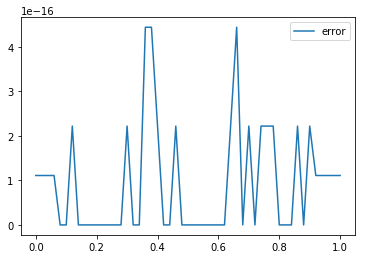

In [90]:
### Enter your code here

def f_FEsecond_uniform(g, K, l, w_n, uniform):
    N = w_n[0].shape[0]
    uniform = np.array(uniform)
    
    X = w_n[0]
    w = w_n[1]
    
    M = np.eye(N)
    for k in range(N):
        for j in range(N):
            M[k, j] -= l * K(X[k], X[j]) * w[j]       # первые строчки повторяют предыдущий код, высчитывая в узлах полинома из w_n значение функции
    
    G = np.array([g(x) for x in X])
    
    f_discrete = np.linalg.solve(M, G)
    
    L = uniform.shape[0]
    K_x = np.zeros((L, N))                  # т.к. сетки необязательно совпадают по размерам, то {K_ij} - прямоугольная матрица
    
    f_uniform = np.array([g(x) for x in uniform])                   # тут у нас не будет СЛАУ как таковой, т.к. в сумме у нас уже все известные f_j
    
    for k in range(L):
        for j in range(N):
            f_uniform[k] += l * K(uniform[k], X[j]) * f_discrete[j] * w[j]      # поэтому мы для кажой нужной нам x на равномерной сетке прибавляем нужную сумму, в которой K зависит от этого x
    
    return f_uniform    # тут возвращаю просто значение функции на равномерной сетке

Direct = f_FEsecond_uniform(g, K, lamb, w_n, uniform)
plt.plot(uniform, np.abs(Direct-Exact), label='error')   # смотрим на ошибку в каждом узле

plt.legend()
plt.show()

Для одного и того же N(в данном примере это N=9), метод где мы используем для интерполяции само же уравнение фредгольма дает на много порядков результат лучше